#Δειγματοληψία

Όλοι οι μετασχηματισμοί εικόνας που μελετήσαμε μέχρι τώρα παράγουν εικόνες εξόδου του ίδιου μεγέθους με τις εισόδους.

Για την υλοποίηση διαφόρων εφαρμογών πολλές φορές θέλουμε να αλλάξουμε την ανάλυση μιας εικόνας. 

Για παράδειγμα, ίσως χρειαστεί να υπερδειγματοληπτήσουμε για να αυξήσουμε την ανάλυση μιας εικόνας για να ταιριάζει με εκείνη ενός εκτυπωτή ή οθόνης ή ίσως θέλουμε να υποδειγματοληπτήσουμε για να μειώσουμε το μέγεθος μιας εικόνας για να επιταχύνουμε την εκτέλεση ενός αλγορίθμου ή να εξοικονομήσουμε χώρο αποθήκευσης ή χρόνο μετάδοσής της.


Σε αυτό το notebook, θα ασχοληθούμε αρχικά με φίλτρα για αλλαγή της ανάλυσης εικόνας, δηλαδή, υπερδειγματοληψία (παρεμβολή) και υποδειγματοληψία (αποδεκατισμός) και έπειτα θα ασχοληθούμε με πυραμίδες πολλαπλής ανάλυσης, οι οποίες μπορούν να χρησιμοποιηθούν για τη δημιουργία μιας πλήρους ιεραρχίας διαφορετικών μεγεθών εικόνων και με τις εφαρμογές τους.

## Δειγματοληψία εικόνας

Η βασική ιδέα στην υποδειγματοληψία εικόνας είναι να αφαιρέσουμε τη μία ανά δύο σειρές και στήλες για να δημιουργήσουμε μια εικόνα μισού μεγέθους.

![](https://drive.google.com/uc?id=1zsM7AvYWHmnDbaTj3NVEN7lf_-U74RA5)

Όταν ο ρυθμός δειγματοληψίας γίνεται πολύ χαμηλός, δεν μπορούμε πλέον να καταγράψουμε τις λεπτομέρειες στην εικόνα. 

![](https://drive.google.com/uc?id=1VVRAu_BqzFiMAH5pfY7kplgUSY2r66Pe)

Χρησιμοποιώντας το θεώρημα δειγματοληψίας του Shannon, η ελάχιστη συχνότητα δειγματοληψία χωρίς να έχουμε αναδιπλώσεις (ανεπιθύμητες ζάρες) πρέπει να είναι τέτοια ώστε: fs≥2fmax.

Για παράδειγμα, έστω ότι θέλουμε να δειγματοληπτήσουμε το ακόλουθο ημιτονοειδές  μοτίβο.

![](https://drive.google.com/uc?id=1JtqnbkPhVu4Qn-jLAB5lDLAyN0vmqk0U)





## Υπερδειγματοληψία (Παρεμβολή-Interpolation)
Για να παρεμβάλλουμε μια εικόνα σε υψηλότερη ανάλυση, πρέπει να επιλέξουμε κάποιον πυρήνα παρεμβολής $h$:

$$g(i,j) = \sum_{k,l} f(k,l)h(i-rk, j-rl)$$ 

Αυτός ο τύπος σχετίζεται με τον διακριτό τύπο συνέλιξης, με την εξαίρεση ότι αντικαθιστούμε τα $k$ και $l$ στο $h()$ με $rk$ και $rl$, όπου $r$ είναι ο ρυθμός δειγματοληψίας. 


*Ποιοι πυρήνες είναι καλύτεροι για παρεμβολή;*

Η απάντηση εξαρτάται από την εφαρμογή και τον χρόνο υπολογισμού.
Οποιοσδήποτε από τους πυρήνες εξομάλυνσης που φαίνονται στον παρακάτω πίνακα μπορεί να χρησιμοποιηθεί μετά από κατάλληλο rescaling. 

Οι πυρήνες εξομάλυνσης στον πίνακα έχουν εμβαδόν μονάδας. Για να τους μετατρέψουμε σε πυρήνες παρεμβολής, απλώς τους αυξάνουμε με τον ρυθμό παρεμβολής r.

![](https://drive.google.com/uc?id=1FrtyGWZwuTt1tVQ4cwKPG6VxvrmsKwVZ)

## Υποδειγματοληψία (Αποδεκατισμός-Decimation)

Για τη μείωση της ανάλυσης μιας εικόνας απαιτείται αποδεκατισμός (μείωση δειγματοληψίας) που πραγματοποιείται κάνοντας συνέλιξη της εικόνας με ένα φίλτρο χαμηλής διέλευσης (για να αποφύγουμε το aliasing):

$$g(i,j) = \sum_{k,l} f(k,l)h(ri-k, rj-l)$$ 

όπου $h(k,l)$ είναι ο πυρήνας εξομάλυνσης. 

ή εναλλακτικά μπορούμε να γράψουμε

$$g(i,j) =\frac{1}{r}\sum_{k,l} f(k,l)h(i-k/r, j-l/r)$$

και να διατηρήσουμε τον ίδιο πυρήνα $h(k,l)$ τόσο για παρεμβολή όσο και για αποδεκατισμό.



### Παράδειγμα

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Για να πραγματοποιήσουμε υποδειγματοληψία στην εικόνα θα χρησιμοποιήσουμε από  το `cv2.resize` της βιβλιοθήκης του opencv όπου λαμβάνει ως παράμετρο διαφορετικές μέθοδους για παρεμβολή ή αποδεκατισμό. 


```
void cv::resize(	
InputArray 	src,
OutputArray 	dst,
Size 	dsize,
double 	fx = 0,
double 	fy = 0,
int 	interpolation = INTER_LINEAR 
)
```
όπου

`dsize = Size(round(fx*src.cols), round(fy*src.rows))`

`fx	scale factor along the horizontal axis; when it equals 0, it is computed as
(double)dsize.width/src.cols`

`fy	scale factor along the vertical axis; when it equals 0, it is computed as
(double)dsize.height/src.rows`


Οι προτιμότερες μέθοδοι είναι INTER_AREA για υποδειγματοληψία και INTER_CUBIC (αργή) και INTER_LINEAR για υπερδειγματοληψία.

Ως προεπιλογή, η μέθοδος παρεμβολής cv.INTER_LINEAR χρησιμοποιείται για όλους τους σκοπούς αλλαγής μεγέθους εικόνας. 

Μπορείτε να αλλάξετε το μέγεθος μιας εικόνας εισόδου με μία από τις ακόλουθες μεθόδους:

* INTER_NEAREST: nearest neighbor interpolation
* INTER_LINEAR: bilinear interpolation
* INTER_CUBIC: bicubic interpolation
* INTER_AREA: resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire'-free results. 
But when the image is zoomed, it is similar to the INTER_NEAREST method.
* INTER_LANCZOS4: Lanczos interpolation over 8x8 neighborhood
* INTER_LINEAR_EXACT: Bit exact bilinear interpolation. This will produce same results as the nearest neighbor method in PIL, scikit-image or Matlab.

Αναλυτικότερα δείτε [εδώ](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d)

In [ ]:
# έστω ο ακόλουθος πίνακας αναπαριστά μια εικόνα που θέλουμε να υποδειγματοληπτήσουμε
img = np.array([[3,106,107,40,148,112,254,151],
                [62,173,91,93,33,111,139,25],
                [99,137,80,231,101,204,74,219],
                [240,173,85,14,40,230,160,152],
                [230,200,177,149,173,239,103,74],
                [19,50,209,82,241,103,3,87],
                [252,191,55,154,171,107,6,123],
                [7,101,168,85,115,103,32,11]],dtype=np.uint8)


# αλλάζουμε το μέγεθος του πλάτους και του ύψους της εικόνας στο μισό και χρησιμοποιούμε διαφορετικό είδος παρεμβολής
resized_AREA = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2), interpolation=cv2.INTER_AREA)
resized_NEAR = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2), interpolation=cv2.INTER_NEAREST)
resized_LIN = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2), interpolation=cv2.INTER_LINEAR)
resized_CUB = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2), interpolation=cv2.INTER_CUBIC)
resized_LANC= cv2.resize(img, (img.shape[1]//2, img.shape[0]//2), interpolation=cv2.INTER_LANCZOS4)
resized_LINEX = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2), interpolation=cv2.INTER_LINEAR_EXACT)


print("img",img)
print("INTER_AREA:\n",resized_AREA)

print("\nINTER_NEAREST:\n",resized_NEAR)
print("\nINTER_LINEAR:\n",resized_LIN)
print("\nINTER_CUBIC:\n",resized_CUB)
print("\nINTER_LANCZOS4:\n",resized_LANC)
print("\nINTER_LINEAR_EXACT:\n",resized_LINEX)

img [[  3 106 107  40 148 112 254 151]
 [ 62 173  91  93  33 111 139  25]
 [ 99 137  80 231 101 204  74 219]
 [240 173  85  14  40 230 160 152]
 [230 200 177 149 173 239 103  74]
 [ 19  50 209  82 241 103   3  87]
 [252 191  55 154 171 107   6 123]
 [  7 101 168  85 115 103  32  11]]
INTER_AREA:
 [[ 86  83 101 142]
 [162 103 144 151]
 [125 154 189  67]
 [138 116 124  43]]

INTER_NEAREST:
 [[  3 107 148 254]
 [ 99  80 101  74]
 [230 177 173 103]
 [252  55 171   6]]

INTER_LINEAR:
 [[ 86  83 101 142]
 [162 103 144 151]
 [125 154 189  67]
 [138 116 124  43]]

INTER_CUBIC:
 [[ 90  70  87 146]
 [169  96 149 153]
 [ 98 168 220  47]
 [161 105 130  37]]

INTER_LANCZOS4:
 [[ 92  53  77 148]
 [157 103 156 150]
 [ 71 179 236  43]
 [179 103 132  37]]

INTER_LINEAR_EXACT:
 [[ 86  83 101 142]
 [162 103 144 151]
 [125 154 189  67]
 [138 116 124  43]]


In [ ]:
enlarged_AREA = cv2.resize(resized_AREA, (8, 8), interpolation=cv2.INTER_AREA)
print(enlarged_AREA)

[[ 86  86  83  83 101 101 142 142]
 [ 86  86  83  83 101 101 142 142]
 [162 162 103 103 144 144 151 151]
 [162 162 103 103 144 144 151 151]
 [125 125 154 154 189 189  67  67]
 [125 125 154 154 189 189  67  67]
 [138 138 116 116 124 124  43  43]
 [138 138 116 116 124 124  43  43]]


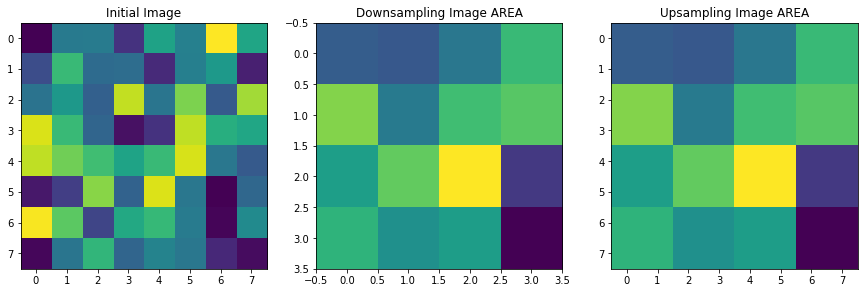

In [ ]:
# Display traning image and testing image
plt.figure(figsize=(15,15))

plt.subplot(131)
plt.title("Initial Image")
plt.imshow(img)
plt.subplot(132)
plt.title("Downsampling Image AREA")
plt.imshow(resized_AREA)
plt.subplot(133)
plt.title("Upsampling Image AREA")
plt.imshow(enlarged_AREA)
plt.show()

### Παράδειγμα με φωτογραφία

In [1]:
from skimage import data
orig_image = data.astronaut()

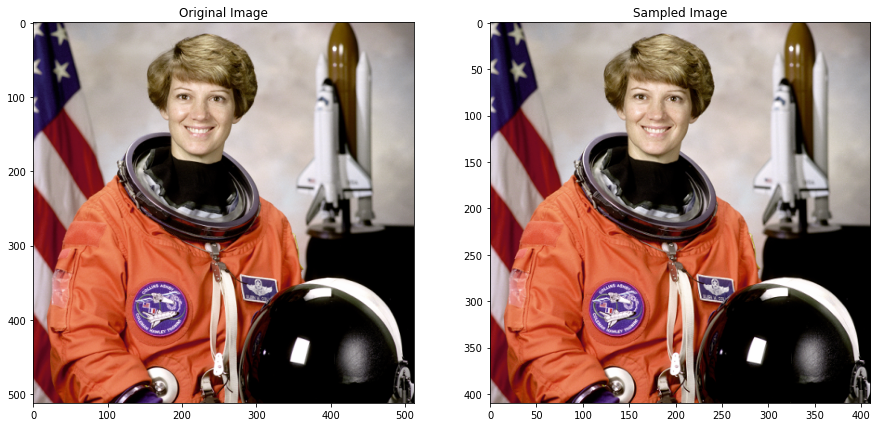

In [8]:
# Αλλάξτε τα fx, fy για πειραματισμό
res = cv2.resize(orig_image, None, fx=0.80, fy=0.80, interpolation = cv2.INTER_CUBIC)

plt.figure(figsize=(15,12))

plt.subplot(121)
plt.imshow(orig_image,cmap = 'gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(res,cmap = 'gray')
plt.title('Sampled Image')

plt.show()

#### Βιβλιογραφία

1. Ψηφιακή Επεξεργασία Εικόνας - Gonzalez, Woods, Ενότητα 4.5.4
2. Computer Vision: Algorithms and Applications, 2nd Edition, Richard Szeliski,  Ενότητα 3.5